# Title

###### Chelsey McMichael and Jelena Colon

# Abstract

# Introduction

# Procedure 

# Data

import file

# Calculations

In [21]:
from astropy.io import ascii
data=ascii.read("data.csv")
avg = sum(data['radius']) / len(data['radius'])
print('The average radius is', data['radius'].mean())

avg1 = sum(data['length']) / len(data['length'])
print('The average length is', data['length'].mean())





The average radius is 10.9
The average length is 1.01923863636


In [28]:
l_avg =1.01923863636  #cm
r_avg = 10.9  #cm

#c = (3 * 10) ** 10 #cm/s
c = 1
r_per = (r_avg) / (0.785) #cm
rho = .07 #gm/cm^3

l_per = l_avg / .785 #cm

m_muon = 3* (2.64 * r_per) /c #MeV/c^2

T = (2.1*((m_muon)* c **2) * rho * l_per)**.5

p_muon = ((T**2) + (2*T*(m_muon)* (c**2)))**.5

m_pion = ((((p_muon * c)**2+ (m_muon * c ** 2) ** 2) **.5) + (p_muon * c ))/ (c **2) #MeV/c^2


print('The mass of the muon is',m_muon, 'MeV/c^2')

print('The mass of the pion is', m_pion, 'MeV/c^2')




The mass of the muon is 109.971974522293 MeV/c^2
The mass of the pion is 146.6260201304343 MeV/c^2


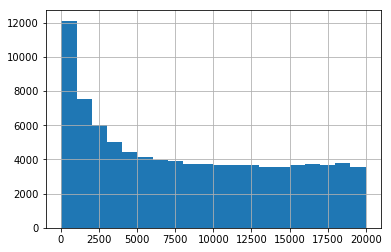

In [33]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt


data=ascii.read("exp_data.csv")
time_change = data['delta_t']

plt.hist(time_change,bins =20)
plt.grid(True)
plt.show()
 #this should be nongaussian


Find the percent error of the mass of the muon.
\begin{equation}
{\%~{error}}= \frac{|Measured~Value - Theoretical~Value|}{Theoretical~Value}\times 100
\end{equation}



Substitute the value of each quantity into the equation:


\begin{equation}
{\%~{error}}= \frac{|109.97~m/s - 110 m/s |}{110~m/s}\times 
\end{equation}


\begin{equation}
{\%~{error}}= \frac{|-0.02802548|}{110~m/s}\times 100
\end{equation}


\begin{equation}
{\%~{error}}= {0.0002547771}\times 100
\end{equation}

\begin{equation}
{\%~{error}}= {0.02548\%}
\end{equation}

Thus, the percentage of error is 0.02548%

Find the percent error of the mass of the pion using:

\begin{equation}
{\%~{error}}= \frac{|Measured~Value - Theoretical~Value|}{Theoretical~Value}\times 100
\end{equation}

Substitute the value of each quantity into the equation:


\begin{equation}
{\%~{error}}= \frac{|146.626~m/s - 140 m/s |}{140~m/s}\times 
\end{equation}


\begin{equation}
{\%~{error}}= \frac{|6.6260|}{110~m/s}\times 100
\end{equation}


\begin{equation}
{\%~{error}}= {0.06023655}\times 100
\end{equation}

\begin{equation}
{\%~{error}}= {6.02366\%}
\end{equation}

Thus, the percentage of error is 6.024%.





# Conlusion